This notebook is used for initial ETL and analysis. The final ETL and analysis is performed through AWS.

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file and remove duplicates

In [2]:
# Read in the crime.csv file and use the timestamp as a datetime index
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data
la_crime = pd.read_csv("la_crime.csv", encoding="ISO-8859-11")

In [3]:
la_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
# Check number of rows in the column. It has 959241 rows and 28 columns
la_crime.shape

(959241, 28)

In [5]:
# Drop some duplicates and check the number of rows. It appears that there is no duplicates.
la_crime.drop_duplicates(inplace=True)
la_crime.shape

(959241, 28)

### Explore the data

In [6]:
# Print the data type and number of non-null values of each column
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959241 entries, 0 to 959240
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           959241 non-null  int64  
 1   Date Rptd       959241 non-null  object 
 2   DATE OCC        959241 non-null  object 
 3   TIME OCC        959241 non-null  int64  
 4   AREA            959241 non-null  int64  
 5   AREA NAME       959241 non-null  object 
 6   Rpt Dist No     959241 non-null  int64  
 7   Part 1-2        959241 non-null  int64  
 8   Crm Cd          959241 non-null  int64  
 9   Crm Cd Desc     959241 non-null  object 
 10  Mocodes         821329 non-null  object 
 11  Vict Age        959241 non-null  int64  
 12  Vict Sex        827919 non-null  object 
 13  Vict Descent    827909 non-null  object 
 14  Premis Cd       959228 non-null  float64
 15  Premis Desc     958671 non-null  object 
 16  Weapon Used Cd  325183 non-null  float64
 17  Weapon Des

Convert some data types

In [7]:
la_crime['DATE OCC']

0         03/01/2020 12:00:00 AM
1         02/08/2020 12:00:00 AM
2         11/04/2020 12:00:00 AM
3         03/10/2020 12:00:00 AM
4         08/17/2020 12:00:00 AM
                   ...          
959236    01/13/2024 12:00:00 AM
959237    02/17/2024 12:00:00 AM
959238    01/16/2024 12:00:00 AM
959239    01/15/2024 12:00:00 AM
959240    04/24/2024 12:00:00 AM
Name: DATE OCC, Length: 959241, dtype: object

In [8]:
# Convert the DATE OCC to datetime object
la_crime['DATE OCC'] = pd.to_datetime(la_crime['DATE OCC'])
la_crime['DATE OCC'].info()

<class 'pandas.core.series.Series'>
Int64Index: 959241 entries, 0 to 959240
Series name: DATE OCC
Non-Null Count   Dtype         
--------------   -----         
959241 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.6 MB


In [9]:
# Error occurred when converting Date Rptd to datetime. Since I only cared about when the crime occured, I leave it as it is.
# la_crime['Date Rptd'] = pd.to_datetime(la_crime['Date Rptd'])
# la_crime['Date Rptd'].info()

In [10]:
# Convert the TIME OCC to hour, minutes, seconds
la_crime['TIME OCC'] = la_crime['TIME OCC'].astype('str').str.zfill(4)
la_crime['TIME OCC'] = pd.to_datetime(la_crime['TIME OCC'].apply(lambda x : x[0:2] + ':' + x[2:] + ':00'))
la_crime['TIME OCC'].info()

<class 'pandas.core.series.Series'>
Int64Index: 959241 entries, 0 to 959240
Series name: TIME OCC
Non-Null Count   Dtype         
--------------   -----         
959241 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.6 MB


In [11]:
la_crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Deal with null values

In [12]:
# Mocodes. 0000 is not taken to represent any activities from the suspect. Hence, I use 0000 to fill the null Mocodes
la_crime['Mocodes'].fillna('0000', inplace=True)

# Vict Sex. F-Female, M-Male, X-Unknown according to the data documentation. Hence, I fill the null sex with X
la_crime['Vict Sex'].fillna('Unknown', inplace=True)
# Replace symbol by its full name according to the documentation
la_crime['Vict Sex'].replace({'-': 'Unknown', 'M': 'Male', 'F': 'Female', 'H': 'Other', 'X': 'Unknown'}, inplace=True)

# Vict Descent. X-Unknown as well according to the data documentation
la_crime['Vict Descent'].fillna('Unknown', inplace=True)
# Replace symbol by its full name according to the documentation
la_crime['Vict Descent'].replace({'-': 'Unknown', 'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 
                                  'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian',
                                  'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native',
                                  'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other',
                                  'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian',
                                  'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'}, 
                                 inplace=True)

In [13]:
# Take a deeper look into Permis cd and Premis Desc
premis = la_crime[['Premis Cd', 'Premis Desc']].drop_duplicates()
#premis.to_csv('premis.csv')

# From the csv file generated, there are cases which have Premis cd but no Desc. 
# Since I do care about the Permis Desc more, I only deal with Permis Desc null values.
la_crime['Premis Desc'].fillna('Unknown', inplace=True)

In [14]:
# Take a deep look into Weapon Used Cd and Weapon Desc.
weapon = la_crime[['Weapon Used Cd', 'Weapon Desc']].drop_duplicates()
#weapon.to_csv('weapon.csv')

# From the csv file generated, I know that code 500 represents Unknown weapon. Hence, I will fill null values with 500.
la_crime['Weapon Used Cd'].fillna(500, inplace=True)

# Fill weapon description with UNKNOWN WEAPON/OTHER WEAPON.
la_crime['Weapon Desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON', inplace=True)

In [15]:
# Check if the null values from the column I cared about are being successfully managed.
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959241 entries, 0 to 959240
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           959241 non-null  int64         
 1   Date Rptd       959241 non-null  object        
 2   DATE OCC        959241 non-null  datetime64[ns]
 3   TIME OCC        959241 non-null  datetime64[ns]
 4   AREA            959241 non-null  int64         
 5   AREA NAME       959241 non-null  object        
 6   Rpt Dist No     959241 non-null  int64         
 7   Part 1-2        959241 non-null  int64         
 8   Crm Cd          959241 non-null  int64         
 9   Crm Cd Desc     959241 non-null  object        
 10  Mocodes         959241 non-null  object        
 11  Vict Age        959241 non-null  int64         
 12  Vict Sex        959241 non-null  object        
 13  Vict Descent    959241 non-null  object        
 14  Premis Cd       959228 non-null  flo

Remove the column I don't want to save space

In [16]:
# Now, we have only 21 columns
la_crime.drop(labels=['Date Rptd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Part 1-2', 'LOCATION'], axis=1, inplace=True)
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959241 entries, 0 to 959240
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           959241 non-null  int64         
 1   DATE OCC        959241 non-null  datetime64[ns]
 2   TIME OCC        959241 non-null  datetime64[ns]
 3   AREA            959241 non-null  int64         
 4   AREA NAME       959241 non-null  object        
 5   Rpt Dist No     959241 non-null  int64         
 6   Crm Cd          959241 non-null  int64         
 7   Crm Cd Desc     959241 non-null  object        
 8   Mocodes         959241 non-null  object        
 9   Vict Age        959241 non-null  int64         
 10  Vict Sex        959241 non-null  object        
 11  Vict Descent    959241 non-null  object        
 12  Premis Cd       959228 non-null  float64       
 13  Premis Desc     959241 non-null  object        
 14  Weapon Used Cd  959241 non-null  flo

In [17]:
# Check number of unique values
for column in la_crime.columns:
    print('{} has {} unique values'.format(column, la_crime[column].nunique()))

DR_NO has 959241 unique values
DATE OCC has 1651 unique values
TIME OCC has 1439 unique values
AREA has 21 unique values
AREA NAME has 21 unique values
Rpt Dist No has 1209 unique values
Crm Cd has 139 unique values
Crm Cd Desc has 139 unique values
Mocodes has 307818 unique values
Vict Age has 104 unique values
Vict Sex has 4 unique values
Vict Descent has 19 unique values
Premis Cd has 314 unique values
Premis Desc has 307 unique values
Weapon Used Cd has 79 unique values
Weapon Desc has 79 unique values
Status has 6 unique values
Status Desc has 6 unique values
LAT has 5423 unique values
LON has 4979 unique values


### Perform Some Analysis

Take a look at what are some areas that have more frequent crime

In [18]:
# We can see that the top 5 area for crime incidents in LA are Central, 77th Street, Pacific, Southwest and Hollywood
la_crime['AREA NAME'].value_counts()

Central        65252
77th Street    59889
Pacific        56066
Southwest      54387
Hollywood      50204
N Hollywood    48808
Southeast      48255
Olympic        48003
Newton         47319
Wilshire       45914
Rampart        44603
West LA        43654
Van Nuys       40974
Northeast      40824
West Valley    40541
Devonshire     39765
Harbor         39622
Topanga        39559
Mission        38378
Hollenbeck     35296
Foothill       31928
Name: AREA NAME, dtype: int64

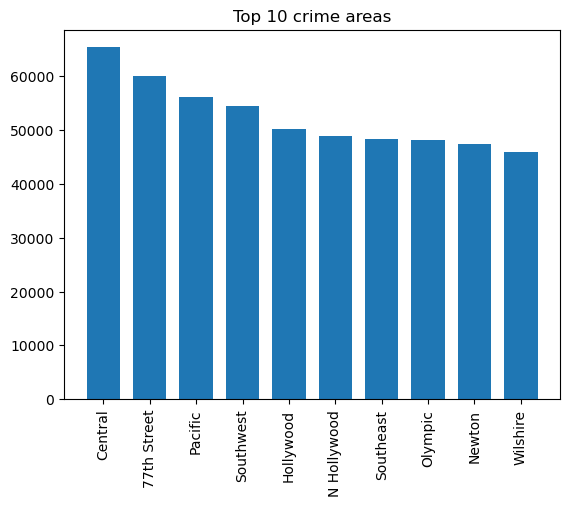

In [19]:
height = la_crime['AREA NAME'].value_counts()[:10]
#plt.figure(figsize=(15, 5))
plt.title('Top 10 crime areas')
plt.bar(x=np.linspace(0, 10, 10), height=height, tick_label=height.index)
plt.xticks(rotation=90)
plt.show()

Take a look at what kind of crimes are common in LA

In [20]:
# The top 5 common crimes in LA are stolen vehicles, battery, burglary from vehicle, theft of identity and vandalism
la_crime['Crm Cd Desc'].value_counts()

VEHICLE - STOLEN                                           105537
BATTERY - SIMPLE ASSAULT                                    74596
BURGLARY FROM VEHICLE                                       59476
THEFT OF IDENTITY                                           59327
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     58180
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
TRAIN WRECKING                                                  1
Name: Crm Cd Desc, Length: 139, dtype: int64

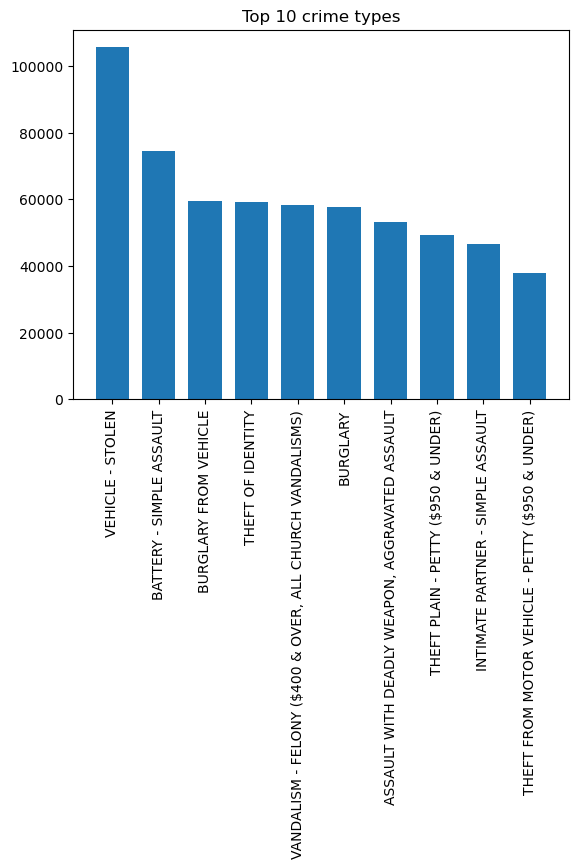

In [21]:
height = la_crime['Crm Cd Desc'].value_counts()[:10]
plt.title('Top 10 crime types')
plt.bar(x=np.linspace(0, 10, 10), height=height, tick_label=height.index)
plt.xticks(rotation=90)
plt.show()

Explore more crime trend w.r.t time

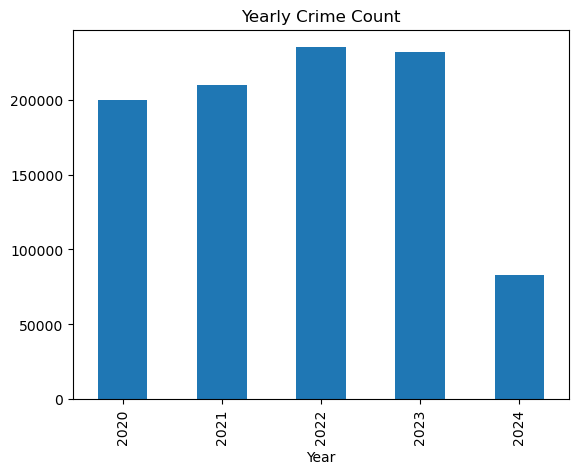

In [22]:
# Excluding 2024 since we are in the middle of this year, the yearly crime keeps increasing until 2022.
la_crime.groupby(by=la_crime['DATE OCC'].dt.year).count()['DR_NO'].plot(kind='bar', xlabel='Year', title='Yearly Crime Count')
plt.show()

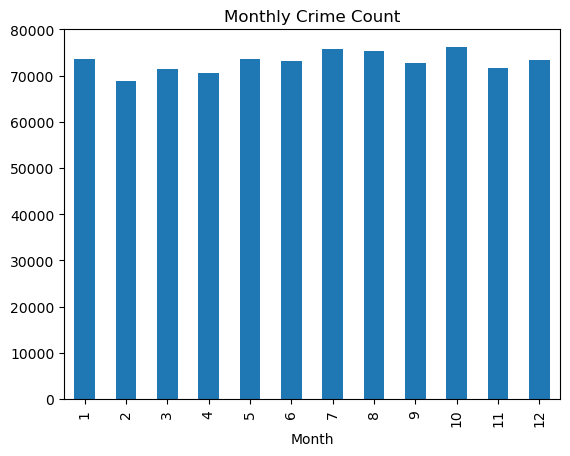

In [23]:
# Exclude 2024 year to remove bias from the extra months. No obvious monthly trend was found.
la_crime_2023 = la_crime.loc[la_crime['DATE OCC'].dt.year != 2024]
la_crime_2023.groupby(by=la_crime_2023['DATE OCC'].dt.month).count()['DR_NO'].plot(kind='bar', xlabel='Month', title='Monthly Crime Count')
plt.show()

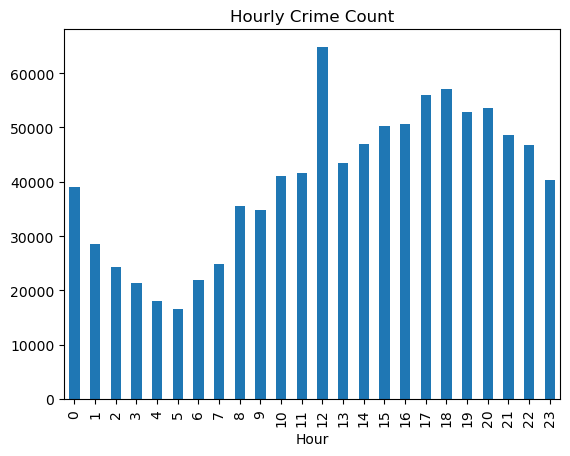

In [24]:
# The hourly trend follows a seasonality trend. Most of the crimes happened at noon. The trend increases from 5 am to 6 pm and then decreases.
la_crime.groupby(by=la_crime['TIME OCC'].dt.hour).count()['DR_NO'].plot(kind='bar', xlabel='Hour', title='Hourly Crime Count')
plt.show()

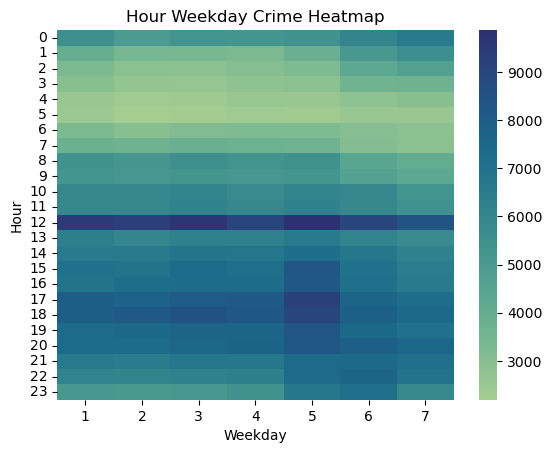

In [25]:
# We can see that crime happened most at noon on Friday
hour_weekday = la_crime.groupby(by=[la_crime['TIME OCC'].dt.hour, la_crime['DATE OCC'].dt.weekday+1]).count()['DR_NO'].unstack()
sns.heatmap(hour_weekday, cmap='crest')
plt.title('Hour Weekday Crime Heatmap')
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.show()

Take a Look at the Victims

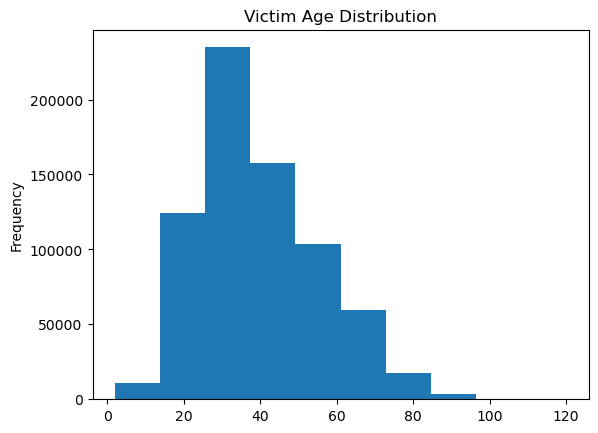

In [26]:
# Excluding age 0, since 0 is being used when age is unknown
# The victims are mainly between 30-50
la_crime[la_crime['Vict Age'] > 0]['Vict Age'].plot(kind='hist', xlabel='Age', title='Victim Age Distribution')
plt.show()

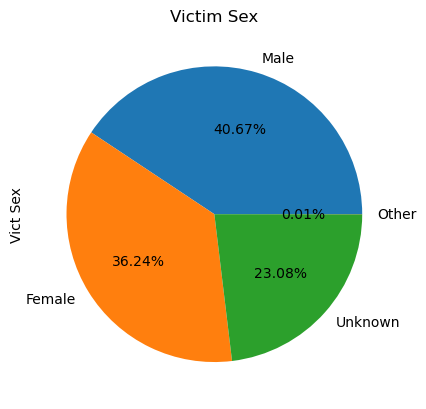

In [27]:
# Males are more likely to be victims than others
plt.title('Victim Sex')
la_crime['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

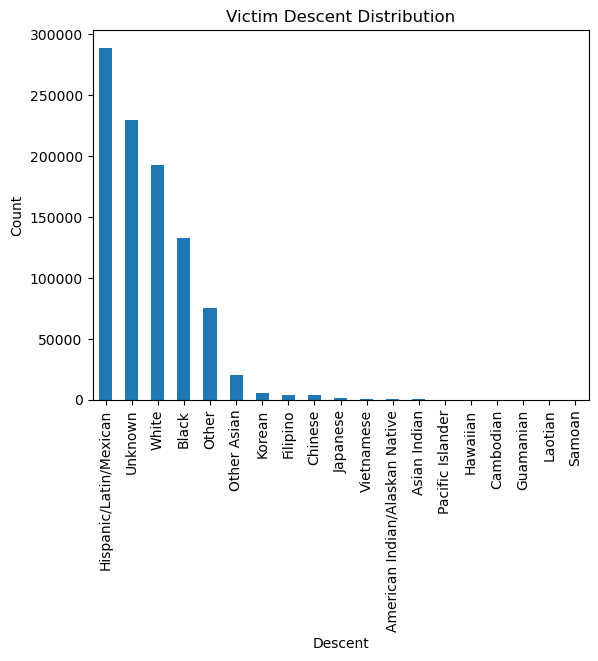

In [28]:
la_crime['Vict Descent'].value_counts().plot(kind='bar', title='Victim Descent Distribution', xlabel='Descent', ylabel='Count')
plt.show()

In [29]:
hisp_pct = la_crime['Vict Descent'].value_counts()[0] / la_crime.shape[0] * 100
print('{:.3f} % of all victims are Hispanic/Latin/Mexican'.format(hisp_pct))

30.124 % of all victims are Hispanic/Latin/Mexican


Take a look at incident location

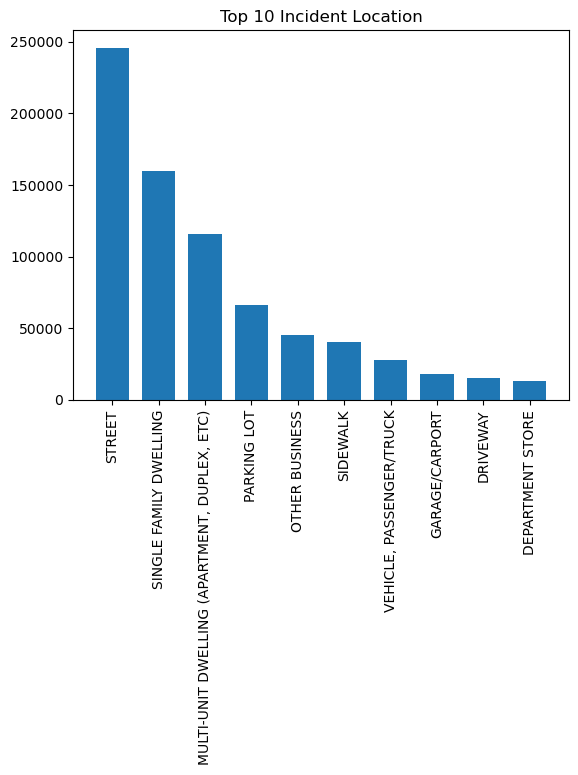

In [30]:
# Most of the crime took place right on the street, while others mainly took place within a family property
height = la_crime['Premis Desc'].value_counts()[:10]
plt.title('Top 10 Incident Location')
plt.bar(x=np.linspace(0, 10, 10), height=height, tick_label=height.index)
plt.xticks(rotation=90)
plt.show()

In [31]:
street_pct = height[0] / la_crime.shape[0]
print('{:.3f} % of all crime are conducted on street'.format(street_pct*100))

25.610 % of all crime are conducted on street


What about the weapon?

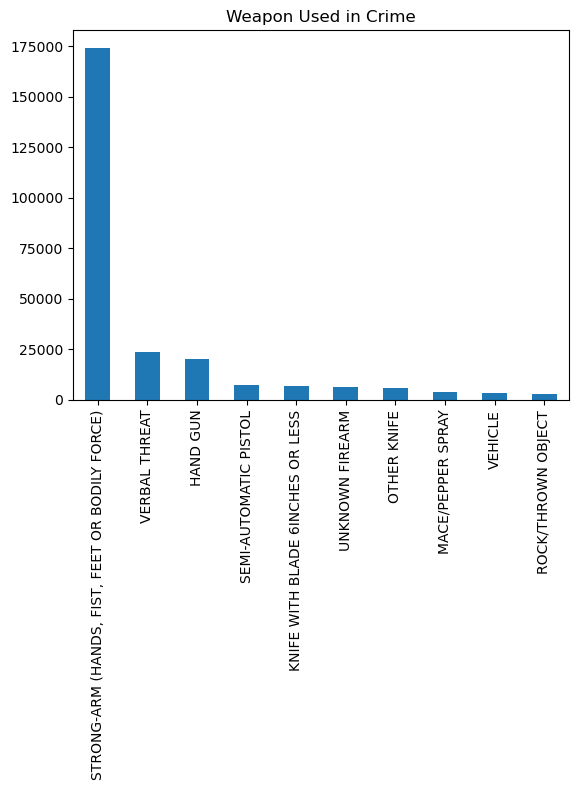

In [32]:
# Excluding unknown weapon, since I am interested in the most used weapons
la_crime['Weapon Desc'].value_counts()[1:11].plot(kind='bar', title='Weapon Used in Crime')
plt.show()

In [33]:
strong_arm_pct = la_crime['Weapon Desc'].value_counts()[1] / la_crime.shape[0]
print('{:.3f} % of all crimes are conducted by Strong-Arm(Hands, Fist, Feet)'.format(strong_arm_pct*100))

18.150 % of all crimes are conducted by Strong-Arm(Hands, Fist, Feet)


What is the result of each crime?

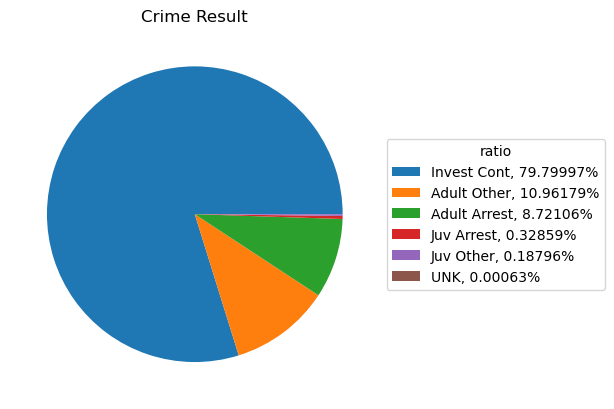

Only 20.200 % of crimes are solved.


In [34]:
# Assuming that the table will be updated once a crime is concluded, this is not a good result as most of the crime are still under investigation
sizes = la_crime['Status Desc'].value_counts()
wedges, texts = plt.pie(sizes)
labels = [f'{label}, {(num / sum(sizes) * 100):0.5f}%' for label, num in zip(sizes.index, sizes)]
plt.legend(wedges, labels,
           title="ratio",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Crime Result')
plt.show()
print('Only {:.3f} % of crimes are solved.'.format(sum(sizes[1:]) / sum(sizes) * 100))